In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [162]:
bold_start = '\033[1m'
bold_end = '\033[0m'

In [3]:
#data = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Ola\Dataset\ola_driver_scaler.csv")
data = pd.read_csv(r"F:\Muthu_2023\Personal\NextStep\DSCourse\Scaler\Business-Case-Study\Ola\Dataset\ola_driver_scaler.csv")
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [5]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [6]:
data.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


## Unique Values

In [6]:
data.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [7]:
for col in data.columns:
    if data[col].nunique() < 6:
        print(col, ": ",  data[col].unique())

Gender :  [ 0.  1. nan]
Education_Level :  [2 0 1]
Joining Designation :  [1 2 3 4 5]
Grade :  [1 2 3 4 5]
Quarterly Rating :  [2 1 4 3]


#### Inference:
- Unnamed: 0 contains unique values, doesn't helpful for EDA and model building
- 24 reporting days of drivers are collected in the dataset
- Total number of drivers in the dataset are 2381
- Dataset Characteristics
    - No of drivers: 2381
    - No. of Cities: 29
    - Joining designation are sectored into 5 categories (1 to 5)
    - 5 different grades are given to the drivers (1 to 5)
    - Quarterly ratings are grouped as 4 categories (1 to 4)

## Null values

In [13]:
data.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
LWD_Flag                    0
dtype: int64

In [8]:
data['LWD_Flag'] = data['LastWorkingDate'].fillna(0)
data['LWD_Flag'] = data['LWD_Flag'].apply(lambda x: 1 if x!=0 else 0)
data.groupby('Driver_ID')['LWD_Flag'].sum().value_counts()

1    1616
0     765
Name: LWD_Flag, dtype: int64

#### Inference:
- No. of unique drivers: 2381
- No. of Active drivers: 765 (No last working date)
- No. of inactive drivers: 1616 

In [10]:
df = pd.DataFrame(index=data['Driver_ID'].unique())
cols = list(data.columns)
for i in range(1, data.shape[1]):
    if cols[i] == "Driver_ID":
        continue
    df[cols[i]] = data.groupby("Driver_ID")[cols[i]].unique()
df.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD_Flag
1,"[01/01/19, 02/01/19, 03/01/19]",[28.0],[0.0],[C23],[2],[57387],[24/12/18],"[nan, 03/11/19]",[1],[1],"[2381060, -665480, 0]",[2],"[0, 1]"
2,"[11/01/20, 12/01/20]",[31.0],[0.0],[C7],[2],[67016],[11/06/20],[nan],[2],[2],[0],[1],[0]
4,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...",[43.0],[0.0],[C13],[2],[65603],[12/07/19],"[nan, 27/04/20]",[2],[2],"[0, 350000]",[1],"[0, 1]"
5,"[01/01/19, 02/01/19, 03/01/19]",[29.0],[0.0],[C9],[0],[46368],[01/09/19],"[nan, 03/07/19]",[1],[1],"[0, 120360]",[1],"[0, 1]"
6,"[08/01/20, 09/01/20, 10/01/20, 11/01/20, 12/01...",[31.0],[1.0],[C11],[1],[78728],[31/07/20],[nan],[3],[3],"[0, 1265000]","[1, 2]",[0]


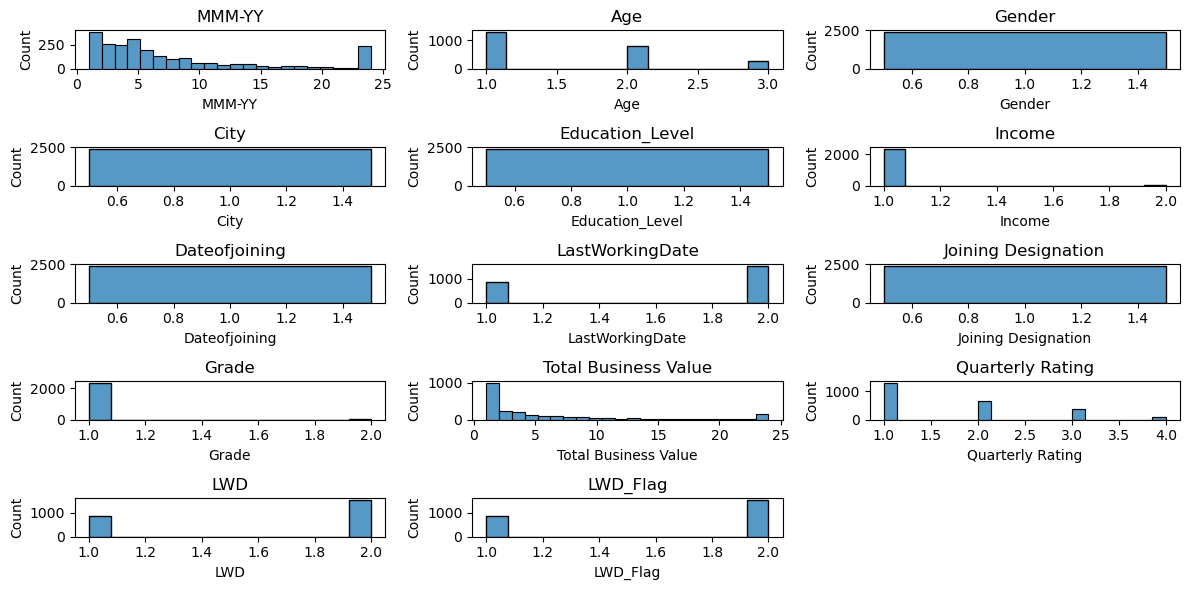

In [65]:
# Check length of unique values in the features in the dataset
plt.figure(figsize=(12,6))
cols_df = list(df.columns)
cnt = 1
for col in cols_df:
    plt.subplot(5,3, cnt)
    sns.histplot(df[col].apply(remove_null).apply(len))
    plt.title(col)
    cnt += 1    
plt.tight_layout()

In [66]:
df[df['Grade'].apply(len) > 1]

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD,LWD_Flag
26,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[41.0, 42.0, 43.0]",[0.0],[C14],[2],"[121529, 132577]",[05/07/18],[nan],[1],"[3, 4]","[243110, 646330, 17651940, 242510, 1098080, 12...","[4, 2]",[0],[0]
54,"[07/01/19, 08/01/19, 09/01/19, 10/01/19, 11/01...","[33.0, 34.0, 35.0]",[0.0],[C29],[1],"[117993, 127826]",[07/11/19],[nan],[4],"[4, 5]","[0, 2000000, 1950000, 1455010, 3398000, 606247...","[2, 3, 4, 1]",[0],[0]
60,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[46.0, 47.0, 48.0]",[1.0],[C20],[0],"[82126, 89592]",[17/09/16],[nan],[1],"[3, 4]","[913700, 1435000, 7799990, 999000, 250000, 500...","[4, 3, 2]",[0],[0]
98,"[08/01/19, 09/01/19, 10/01/19, 11/01/19, 12/01...","[24.0, 25.0]",[0.0],[C16],[0],"[57977, 63774]",[15/08/19],"[nan, 25/12/20]",[2],"[2, 3]","[0, 1374540, 5250000, 2256470, 1410000, 299900...","[3, 4, 1, 2]","[0, 1]","[0, 1]"
275,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[39.0, 40.0, 41.0]",[0.0],[C20],[0],"[89124, 97226]",[05/02/16],[nan],[1],"[3, 4]","[2978880, 875840, 2513360, 371310, 638520, 0, ...","[3, 2, 4, 1]",[0],[0]
307,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[37.0, 38.0, 39.0]",[0.0],[C26],[0],"[80856, 88207]",[10/05/18],"[nan, 26/10/20]",[2],"[3, 4]","[2368600, 1577000, 16079420, 1200000, 0, 21404...","[4, 3, 1]","[0, 1]","[0, 1]"
320,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[27.0, 28.0]",[1.0],[C20],[0],"[56813, 63126]",[13/07/18],[nan],[1],"[1, 2]","[100050, 1675060, 3800670, 545950, 1833110, 26...",[4],[0],[0]
368,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[43.0, 44.0, 45.0]",[0.0],[C23],[1],"[46719, 51911]",[18/09/18],[nan],[1],"[1, 2]","[1254620, 1331810, 2031450, 125290, 2678110, 1...","[4, 2]",[0],[0]
434,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[28.0, 29.0, 30.0]",[1.0],[C6],[2],"[80469, 88515]",[08/11/17],[nan],[1],"[2, 3]","[5033020, 1925490, 3148500, 0, 194010, 300690,...","[4, 2]",[0],[0]
537,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...","[34.0, 35.0]",[1.0],[C29],[1],"[76868, 84554]",[12/06/19],[nan],[2],"[2, 3]","[0, 1914780, 3343490, 5931040, 499040, 1168740...","[1, 4]",[0],[0]


In [67]:
df[df['Income'].apply(len) > 1]

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD,LWD_Flag
26,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[41.0, 42.0, 43.0]",[0.0],[C14],[2],"[121529, 132577]",[05/07/18],[nan],[1],"[3, 4]","[243110, 646330, 17651940, 242510, 1098080, 12...","[4, 2]",[0],[0]
54,"[07/01/19, 08/01/19, 09/01/19, 10/01/19, 11/01...","[33.0, 34.0, 35.0]",[0.0],[C29],[1],"[117993, 127826]",[07/11/19],[nan],[4],"[4, 5]","[0, 2000000, 1950000, 1455010, 3398000, 606247...","[2, 3, 4, 1]",[0],[0]
60,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[46.0, 47.0, 48.0]",[1.0],[C20],[0],"[82126, 89592]",[17/09/16],[nan],[1],"[3, 4]","[913700, 1435000, 7799990, 999000, 250000, 500...","[4, 3, 2]",[0],[0]
98,"[08/01/19, 09/01/19, 10/01/19, 11/01/19, 12/01...","[24.0, 25.0]",[0.0],[C16],[0],"[57977, 63774]",[15/08/19],"[nan, 25/12/20]",[2],"[2, 3]","[0, 1374540, 5250000, 2256470, 1410000, 299900...","[3, 4, 1, 2]","[0, 1]","[0, 1]"
275,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[39.0, 40.0, 41.0]",[0.0],[C20],[0],"[89124, 97226]",[05/02/16],[nan],[1],"[3, 4]","[2978880, 875840, 2513360, 371310, 638520, 0, ...","[3, 2, 4, 1]",[0],[0]
307,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[37.0, 38.0, 39.0]",[0.0],[C26],[0],"[80856, 88207]",[10/05/18],"[nan, 26/10/20]",[2],"[3, 4]","[2368600, 1577000, 16079420, 1200000, 0, 21404...","[4, 3, 1]","[0, 1]","[0, 1]"
320,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[27.0, 28.0]",[1.0],[C20],[0],"[56813, 63126]",[13/07/18],[nan],[1],"[1, 2]","[100050, 1675060, 3800670, 545950, 1833110, 26...",[4],[0],[0]
368,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[43.0, 44.0, 45.0]",[0.0],[C23],[1],"[46719, 51911]",[18/09/18],[nan],[1],"[1, 2]","[1254620, 1331810, 2031450, 125290, 2678110, 1...","[4, 2]",[0],[0]
434,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[28.0, 29.0, 30.0]",[1.0],[C6],[2],"[80469, 88515]",[08/11/17],[nan],[1],"[2, 3]","[5033020, 1925490, 3148500, 0, 194010, 300690,...","[4, 2]",[0],[0]
537,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...","[34.0, 35.0]",[1.0],[C29],[1],"[76868, 84554]",[12/06/19],[nan],[2],"[2, 3]","[0, 1914780, 3343490, 5931040, 499040, 1168740...","[1, 4]",[0],[0]


In [64]:
def remove_null(x):
    try:
        return x[~np.isnan(x)]
    except:
        return x

#### Inference:
- Age:
    - Multiple Age for the same driver is identified, indicates the increase in age
    - Mean Age while grouping
- Grading:
    - Multiple grading for the same driver is identified
    - Calculate change in grading (Current - Initial)
    - Recent Grading
- Gender, City, Education Level, Date of Joining, Joining Designation:
    - Unique values for the driver
- Last Working Date:
    - if no last working date then active driver
- Quarterly Rating:
    - Multiple rating for the same driver is identified
    - Calculation change in rating (current - initial)
- Business Value:
    - Multiple Business value for the same driver is identified
    - Mean business value while grouping
    - No. of negative business value
- Income:
    - Observed Multiple income for single driver
    - Average income, Recent income

In [81]:
for i in a:
    if i == np.nan:
        print(i)

In [83]:
data.dropna().groupby("Driver_ID", dropna=True)['LastWorkingDate'].unique()

Driver_ID
1       [03/11/19]
4       [27/04/20]
5       [03/07/19]
8       [15/11/20]
12      [21/12/19]
           ...    
2779    [14/02/20]
2782    [16/08/19]
2785    [28/10/20]
2786    [22/09/19]
2787    [20/06/19]
Name: LastWorkingDate, Length: 1606, dtype: object

In [105]:
df_final = pd.DataFrame(index=data['Driver_ID'].unique())
df_final['ServiceMonths'] = df['MMM-YY'].apply(len)
df_final['Age'] = df['Age'].apply(np.mean)
df_final['Gender'] = df['Gender'].apply(lambda x: x[0])
df_final['City'] = df['City'].apply(lambda x: x[0])
df_final['Education_Level'] = df['Education_Level'].apply(lambda x: x[0])
df_final['AvgIncome'] = df['Income'].apply(np.mean)
df_final['RecentIncome'] = df['Income'].apply(lambda x: x[-1])
df_final['DOJ_Year'] = pd.to_datetime(df['Dateofjoining'].apply(lambda x: x[0])).dt.year
df_final['DOJ_Month'] = pd.to_datetime(df['Dateofjoining'].apply(lambda x: x[0])).dt.month
df_final['Joining Designation'] = df['Joining Designation'].apply(lambda x: x[0])
df_final['GradeRecent'] = df['Grade'].apply(lambda x: x[-1])
df_final['GradeChange'] = df['Grade'].apply(lambda x: x[-1]-x[0])
df_final['BV'] = df['Total Business Value'].apply(np.mean)
df_final['NegBV'] = df['Total Business Value'].apply(count_neg)
df_final['QRRecent'] = df['Quarterly Rating'].apply(lambda x: x[-1])
df_final['QRChange'] = df['Quarterly Rating'].apply(lambda x: x[-1]-x[0])
df_final['LWD'] = df['LWD_Flag'].apply(np.max)
df_final.head()

,ServiceMonths,Age,Gender,City,Education_Level,AvgIncome,RecentIncome,DOJ_Year,DOJ_Month,Joining Designation,GradeRecent,GradeChange,BV,NegBV,QRRecent,QRChange,LWD
1,3,28.0,0.0,C23,2,57387.0,57387,2018,12,1,1,0,571860.0,1,2,0,1
2,2,31.0,0.0,C7,2,67016.0,67016,2020,11,2,2,0,0.0,0,1,0,0
4,5,43.0,0.0,C13,2,65603.0,65603,2019,12,2,2,0,175000.0,0,1,0,1
5,3,29.0,0.0,C9,0,46368.0,46368,2019,1,1,1,0,60180.0,0,1,0,1
6,5,31.0,1.0,C11,1,78728.0,78728,2020,7,3,3,0,632500.0,0,2,1,0


In [60]:
df

,ServiceMonths,Age,Gender,City,Education_Level,AvgIncome,RecentIncome,DOJ_Year,DOJ_Month,Joining Designation,GradeRecent,GradeChange,BV,NegBV,QRRecent,LWD
1,3,28.0,0.0,C23,2,57387.0,57387,2018,12,1,1,0,571860.0,125.0,0,1
2,2,31.0,0.0,C7,2,67016.0,67016,2020,11,2,2,0,0.0,9.0,0,0
4,5,43.0,0.0,C13,2,65603.0,65603,2019,12,2,2,0,175000.0,NaN,0,1
5,3,29.0,0.0,C9,0,46368.0,46368,2019,1,1,1,0,60180.0,NaN,0,1
6,5,31.0,1.0,C11,1,78728.0,78728,2020,7,3,3,0,632500.0,NaN,1,0


In [65]:
df_final.isnull().sum()

ServiceMonths           0
Age                    57
Gender                  6
City                    0
Education_Level         0
AvgIncome               0
RecentIncome            0
DOJ_Year                0
DOJ_Month               0
Joining Designation     0
GradeRecent             0
GradeChange             0
BV                      0
NegBV                   0
QRRecent                0
LWD                     0
dtype: int64

In [ ]:
temp = (pd.to_datetime(data.dropna()['LastWorkingDate']) - pd.to_datetime(data.dropna()['Dateofjoining'], dayfirst=True)) / np.timedelta64(1, 'D')
temp[temp<0]

In [ ]:
#### Inference:
- Lot of errors in the data collection for datejoining column
- Test:
    - After removing na values, Lastworkingdate - JoiningDate gives many negative values

In [50]:
def count_neg(x):
    cnt = 0
    for val in x:
        if val < 0:
            cnt += 1
    return cnt

In [66]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 1 to 2788
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ServiceMonths        2381 non-null   int64  
 1   Age                  2324 non-null   float64
 2   Gender               2375 non-null   float64
 3   City                 2381 non-null   object 
 4   Education_Level      2381 non-null   int64  
 5   AvgIncome            2381 non-null   float64
 6   RecentIncome         2381 non-null   int64  
 7   DOJ_Year             2381 non-null   int64  
 8   DOJ_Month            2381 non-null   int64  
 9   Joining Designation  2381 non-null   int64  
 10  GradeRecent          2381 non-null   int64  
 11  GradeChange          2381 non-null   int64  
 12  BV                   2381 non-null   float64
 13  NegBV                2381 non-null   int64  
 14  QRRecent             2381 non-null   int64  
 15  LWD                  2381 non-null   i

#### Inference:
- All the columns are numerical except city column that requires categorical encoding
- Age and Gender column requires imputation for Null values

# Exploratory Data Analysis

# Univariate Analysis

In [128]:
target = ['LWD']
cat_features = ['Gender', 'City', 'Education_Level', 'DOJ_Year', 'DOJ_Month', 'Joining Designation', 'GradeRecent', 'GradeChange', 'NegBV', 'QRChange', 'QRRecent']
num_features = [feature for feature in list(df_final.describe().columns) if feature not in target+cat_features]
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)
print("Target Feature:", target)

Numerical Features: ['ServiceMonths', 'Age', 'AvgIncome', 'RecentIncome', 'BV']
Categorical Features: ['Gender', 'City', 'Education_Level', 'DOJ_Year', 'DOJ_Month', 'Joining Designation', 'GradeRecent', 'GradeChange', 'NegBV', 'QRChange', 'QRRecent']
Target Feature: ['LWD']


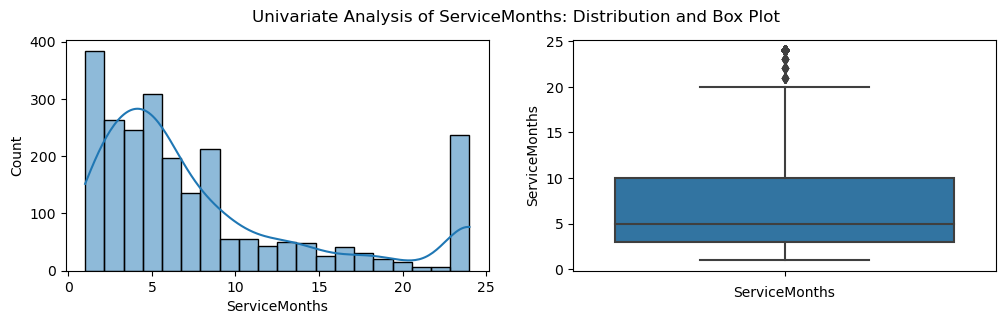

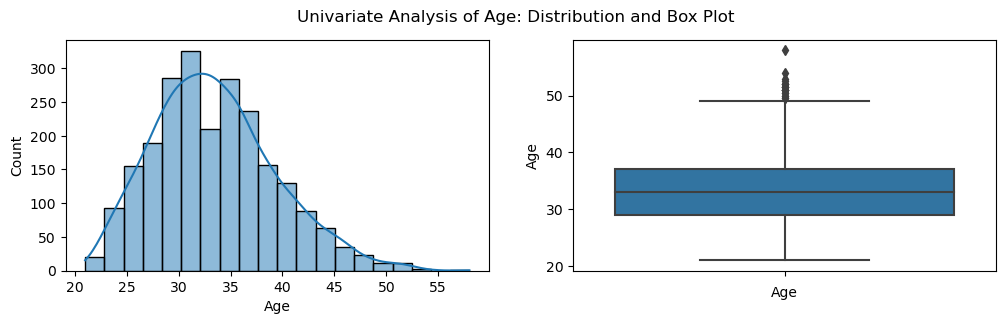

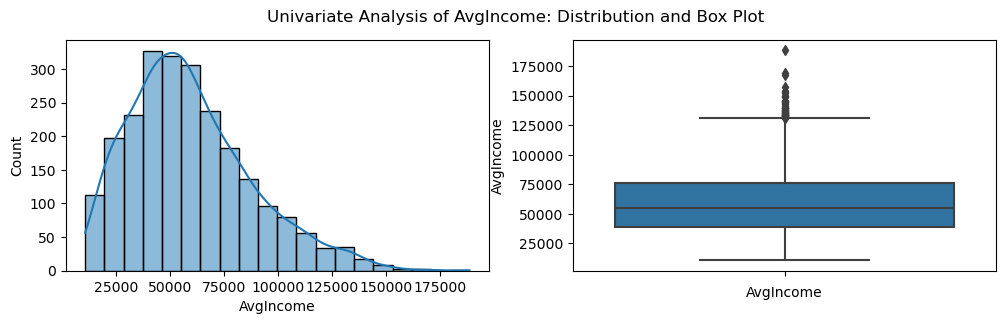

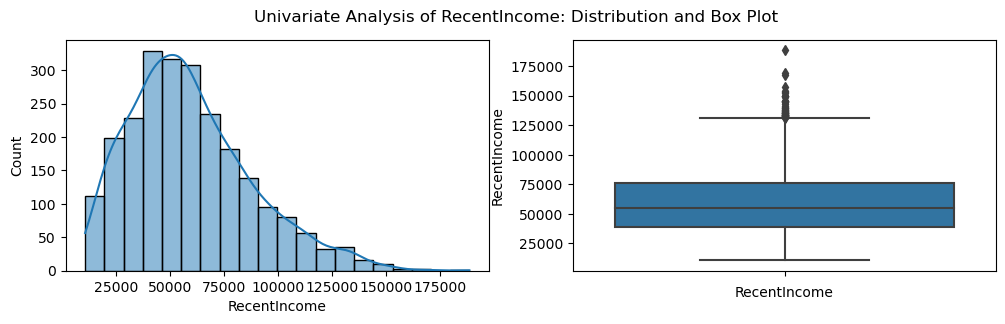

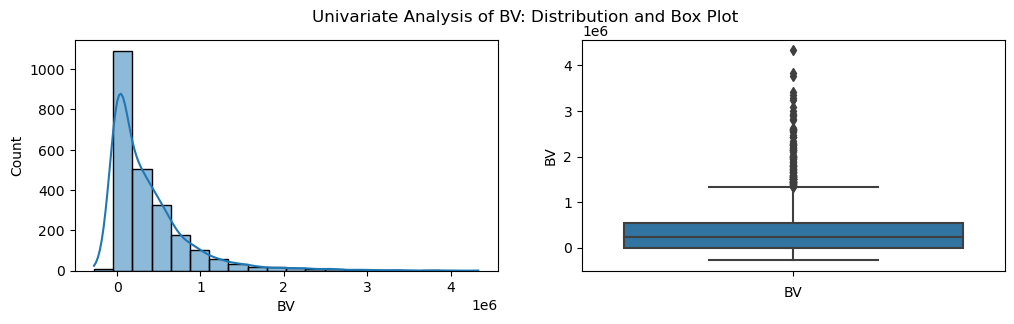

In [129]:
# Numerical Features
for feature in num_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.histplot(df_final[feature], kde=True, bins=20)
    plt.subplot(1,2,2)
    sns.boxplot(data = df_final, y = feature)
    plt.xlabel(feature)

#### Inference:
- Service in months, double peak is observed
- Age is almost normally distributed, hence mean imputation for missing value can be performed
- Average Income and Recent Income seems to follow same distribution and it is slightly right skewed
- Average Business Value is significantly right skewed 

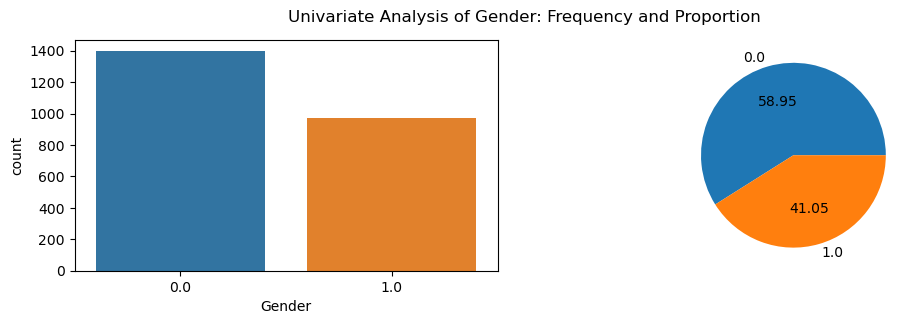

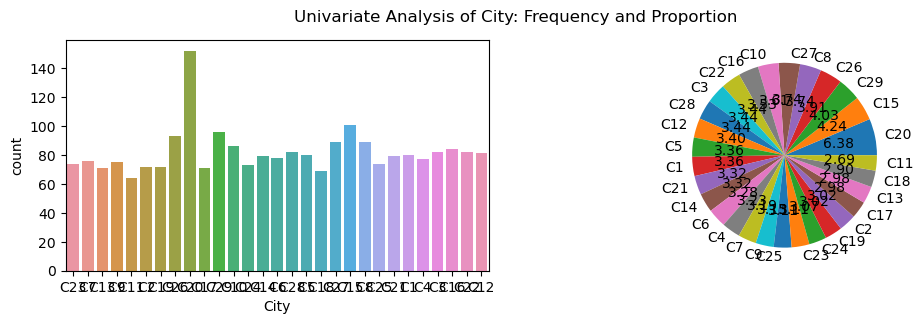

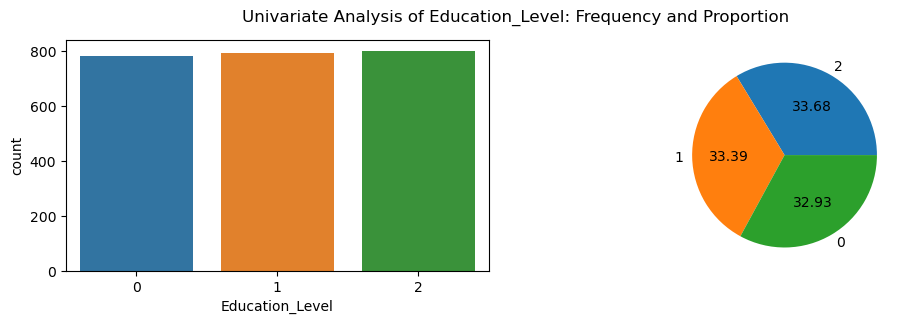

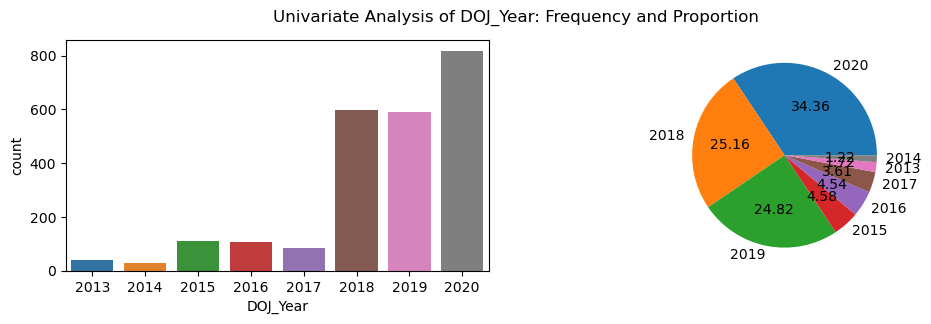

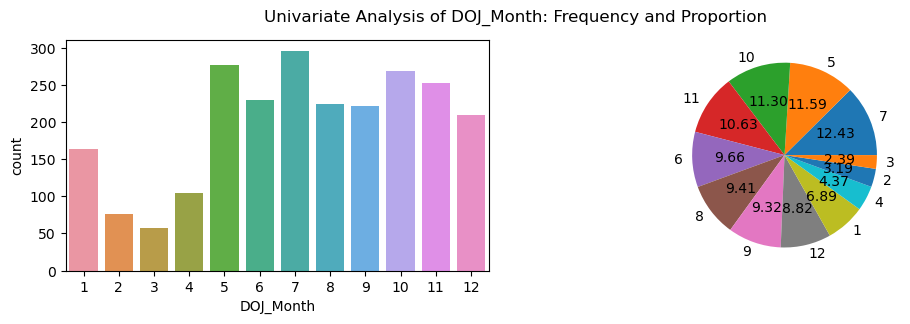

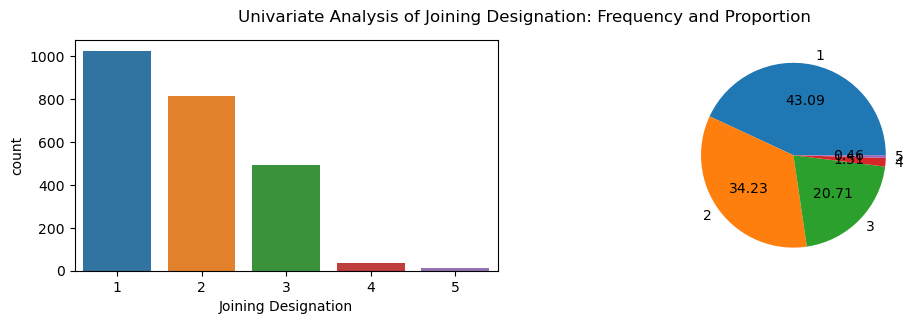

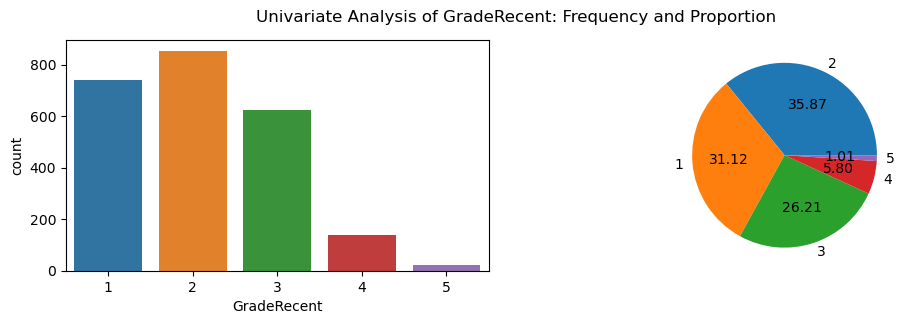

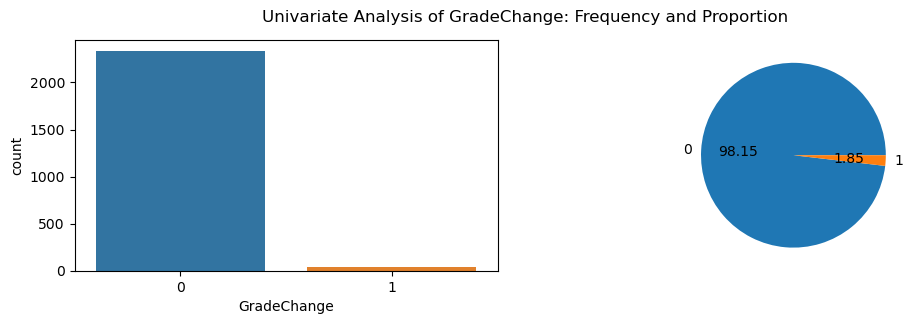

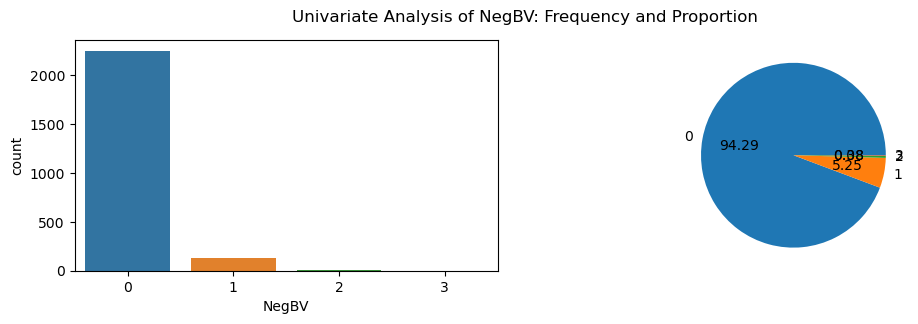

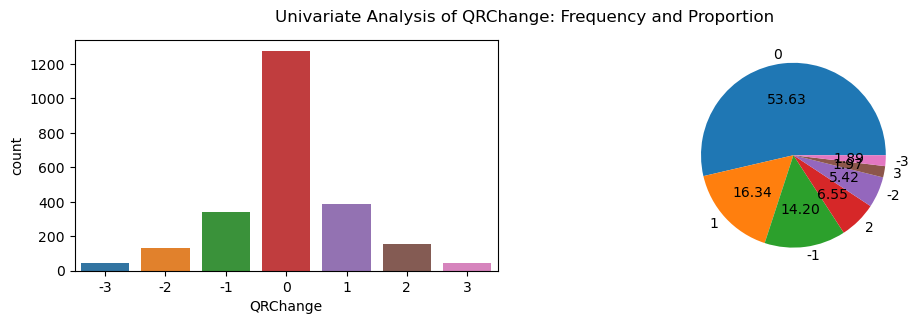

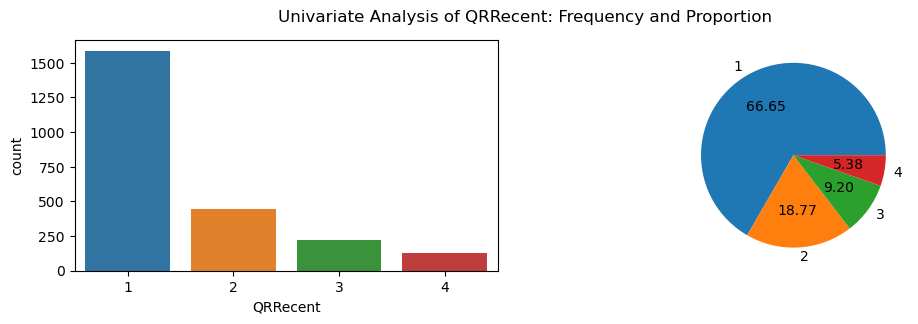

In [130]:
# Categorical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
    plt.subplot(1,2,1)
    sns.countplot(data=df_final, x=feature) 
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    plt.pie(x=list(df_final[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
    plt.show()

#### Inference:
- Recent Quarterly Rating (QRRecent): Most drivers have a rating of 1, indicating lesser performance.
- Change in Quarterly Rating: Typically follows a normal distribution centered at 0, showing that most drivers experience no significant change in their ratings.
- Negative Business Value: Rarely occurs, indicating minimal influence on driver churn prediction.
- Grade Change: Rarely observed and does not significantly affect churn predictions.
- Recent Grading: Over 90% of drivers are graded between 1-3, with grade 1 being the most common.
- Joining Designation: Over 95% of drivers join at grades 1-3, with grade 1 signifying novice drivers.
- Joining Year: The majority of drivers joined after 2018, suggesting business growth and momentum post-2018.
- Education Level: Equally distributed among drivers, indicating no strong correlation with churn.
- Gender Distribution: Maintains a 60/40 ratio, with Gender 0 being predominant. Missing gender values can be safely imputed with 0.

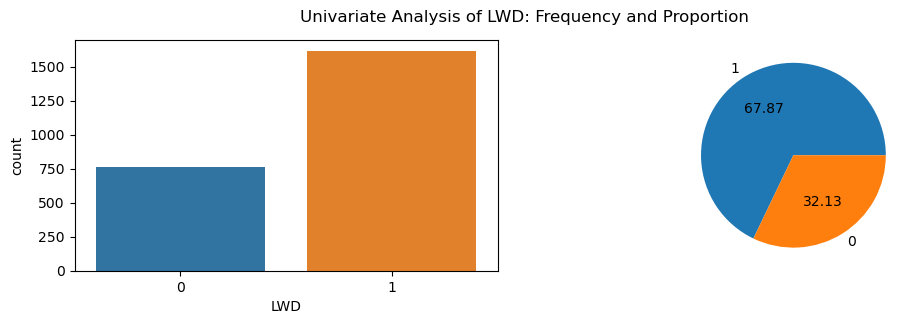

In [114]:
# Target Feature
feature = 'LWD'
plt.figure(figsize=(12,3))
plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
plt.subplot(1,2,1)
sns.countplot(data=df_final, x=feature) 
plt.subplot(1,2,2)
labels = df_final[feature].value_counts().index
plt.pie(x=list(df_final[feature].value_counts()), labels=list(labels), autopct="%0.2f")        
plt.show()

#### Inference:
- Heavily unbalanced dataset with churned drivers 68% and loyal drivers 32%

## Bivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


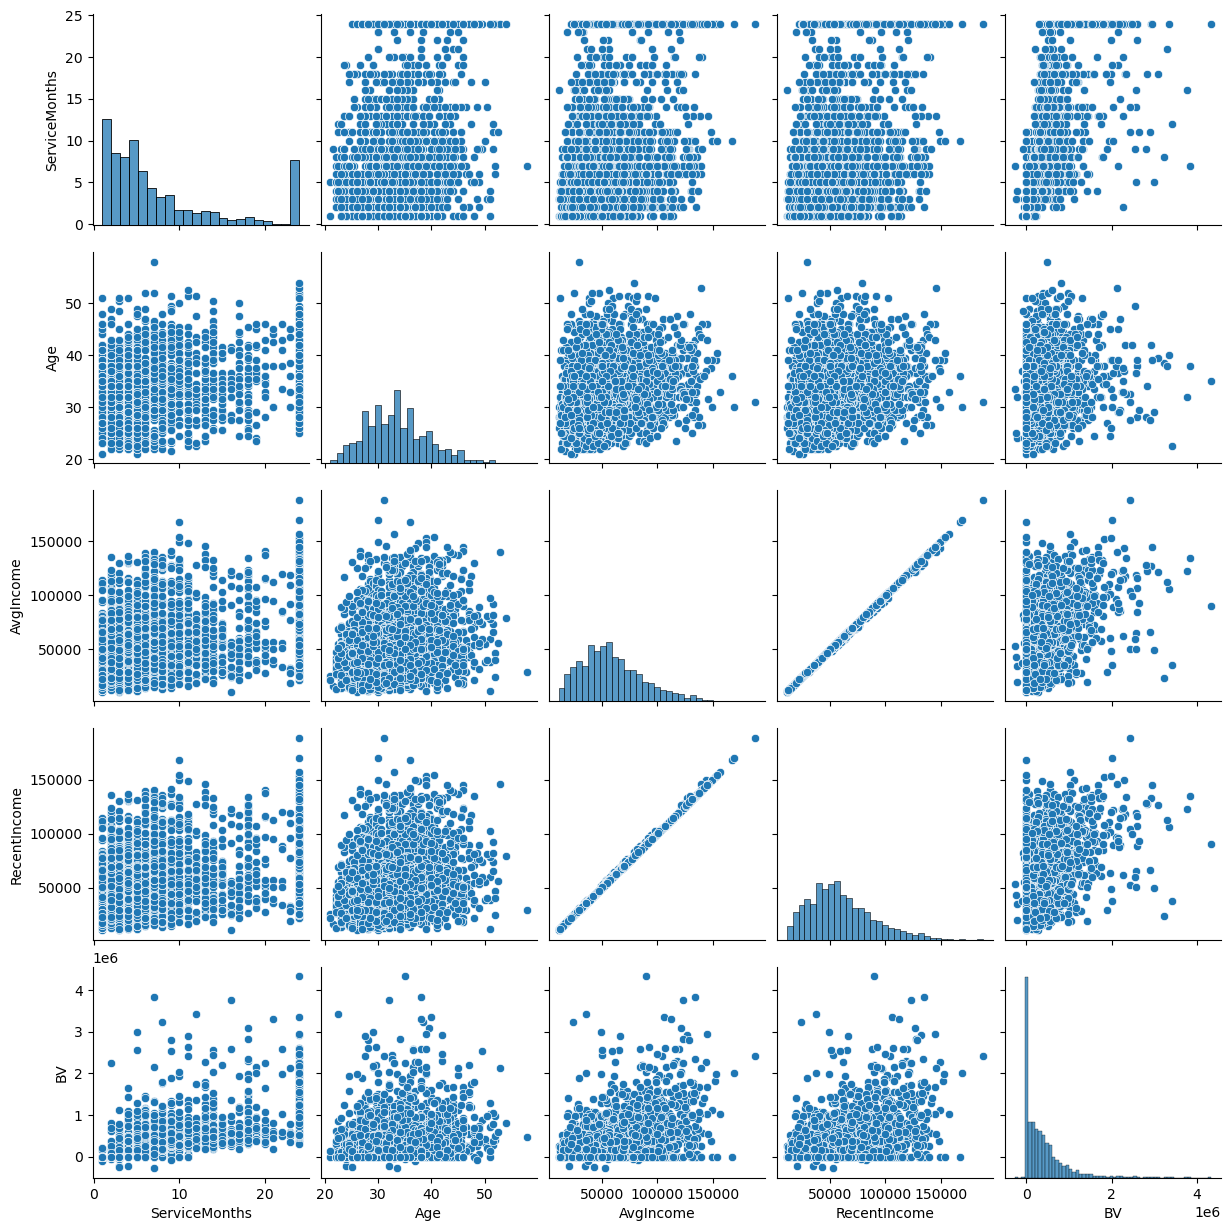

In [115]:
# Numerical Features
sns.pairplot(df_final[num_features])

#### Inference:
- AvgIncome and RecentIncome are highly correlated, seems to be a redundant feature

In [ ]:
#Numerical Features vs Target
for feature in num_features:
    plt.figure(figsize=(12,3))
    plt.suptitle('Univariate Analysis of ' + feature + ": Distribution and Box Plot")
    plt.subplot(1,2,1)
    sns.boxplot(data=raw_df, y= feature, x='LWD')
    plt.subplot(1,2,2)
    sns.boxplot(data = df_final, y = feature)
    plt.xlabel(feature)
    

In [124]:
#Categorical Features vs Target
def TargetVsFeaturePlot(df, feature1, feature2=None):
    plt.figure(figsize=(12,3))
    #plt.suptitle('Univariate Analysis of ' + feature + ": Frequency and Proportion")
    if feature2 is None:
        sns.countplot(data = df, x = feature1, hue='LWD')
        plt.title("LWD Vs " + feature1) 
        plt.show()
    else:
        plt.subplot(1,2,1)
        sns.countplot(data = df, x = feature1, hue='LWD')
        plt.title("LWD Vs " + feature1)
        plt.subplot(1,2,2)
        labels = df_final[feature].value_counts().index
        sns.countplot(data = df, x = feature2, hue='LWD')    
        plt.title("LWD Vs " + feature2)
        plt.show()

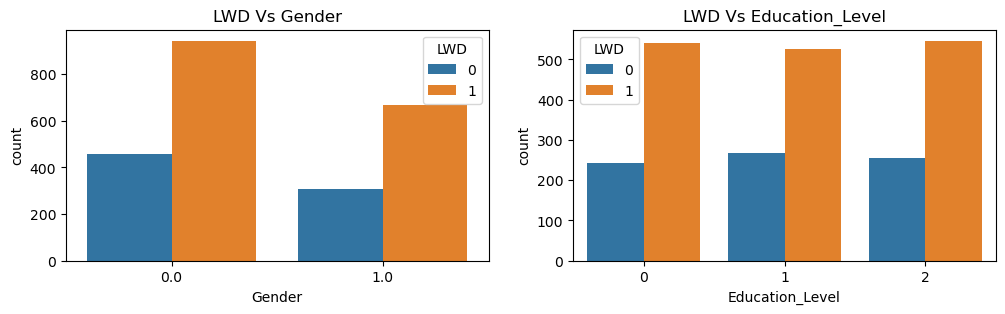

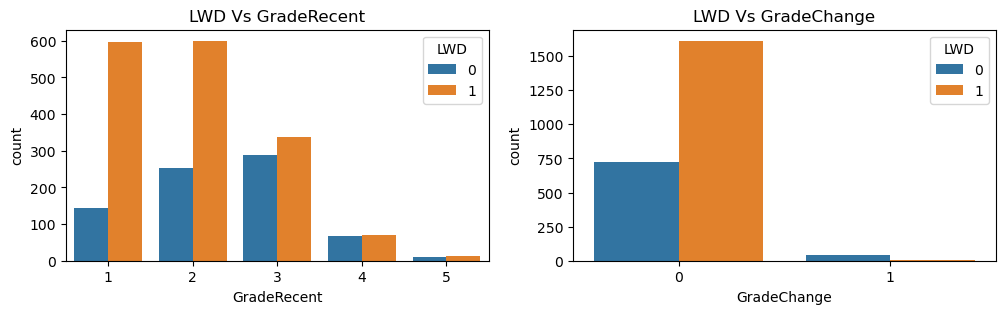

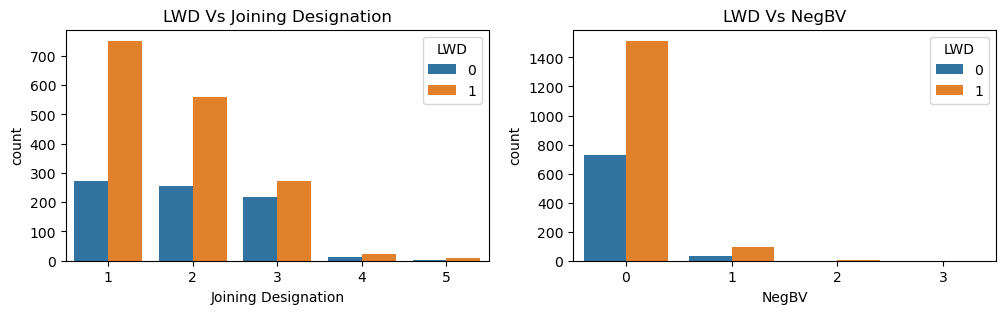

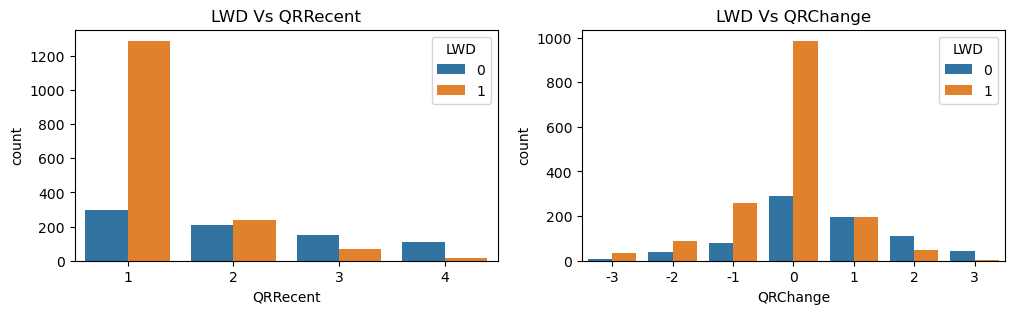

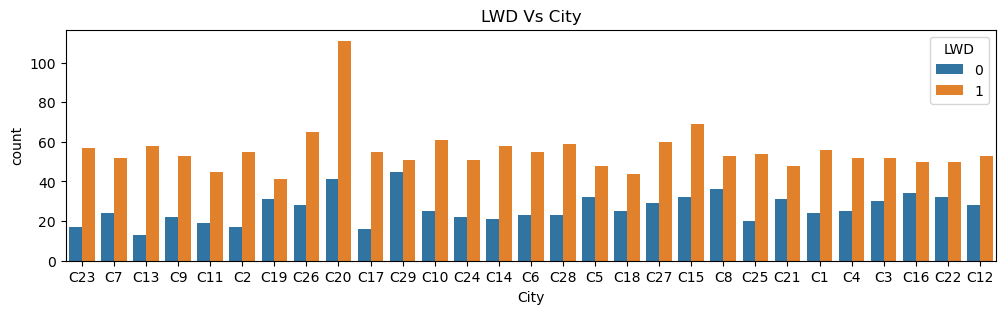

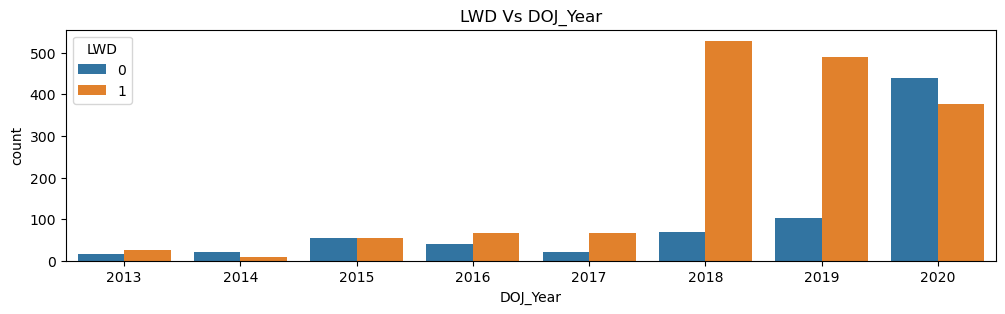

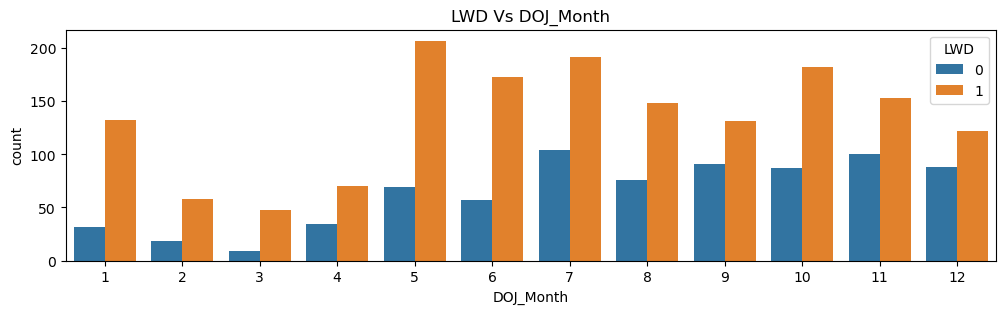

In [131]:
TargetVsFeaturePlot(df_final, 'Gender', 'Education_Level')
TargetVsFeaturePlot(df_final, 'GradeRecent', 'GradeChange')
TargetVsFeaturePlot(df_final, 'Joining Designation', 'NegBV')
TargetVsFeaturePlot(df_final, 'QRRecent', 'QRChange')
TargetVsFeaturePlot(df_final, 'City')
TargetVsFeaturePlot(df_final, 'DOJ_Year')
TargetVsFeaturePlot(df_final, 'DOJ_Month')

#### Inference:
- Gender and education levels are having equal likelihood of churning
- Drivers with grades 1 and 2 are highly likely to churn, while those with grades 3-5 are very unlikely to churn
- Drivers with joining designations of 1 and 2 tend to churn more frequently
- Drivers with a large number of negative business values are highly likely to churn
- Recent Quarterly Rating: Drivers with a recent quarterly rating of 1 are very highly likely to churn
- Change in Quarterly Rating: Drivers with a positive change in their quarterly rating are very unlikely to churn
- Drivers who joined in 2020 are very unlikely to churn
- Drivers from city C20 are highly likely to churn, while those from city C29 are less likely to churn

## Multivariate Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


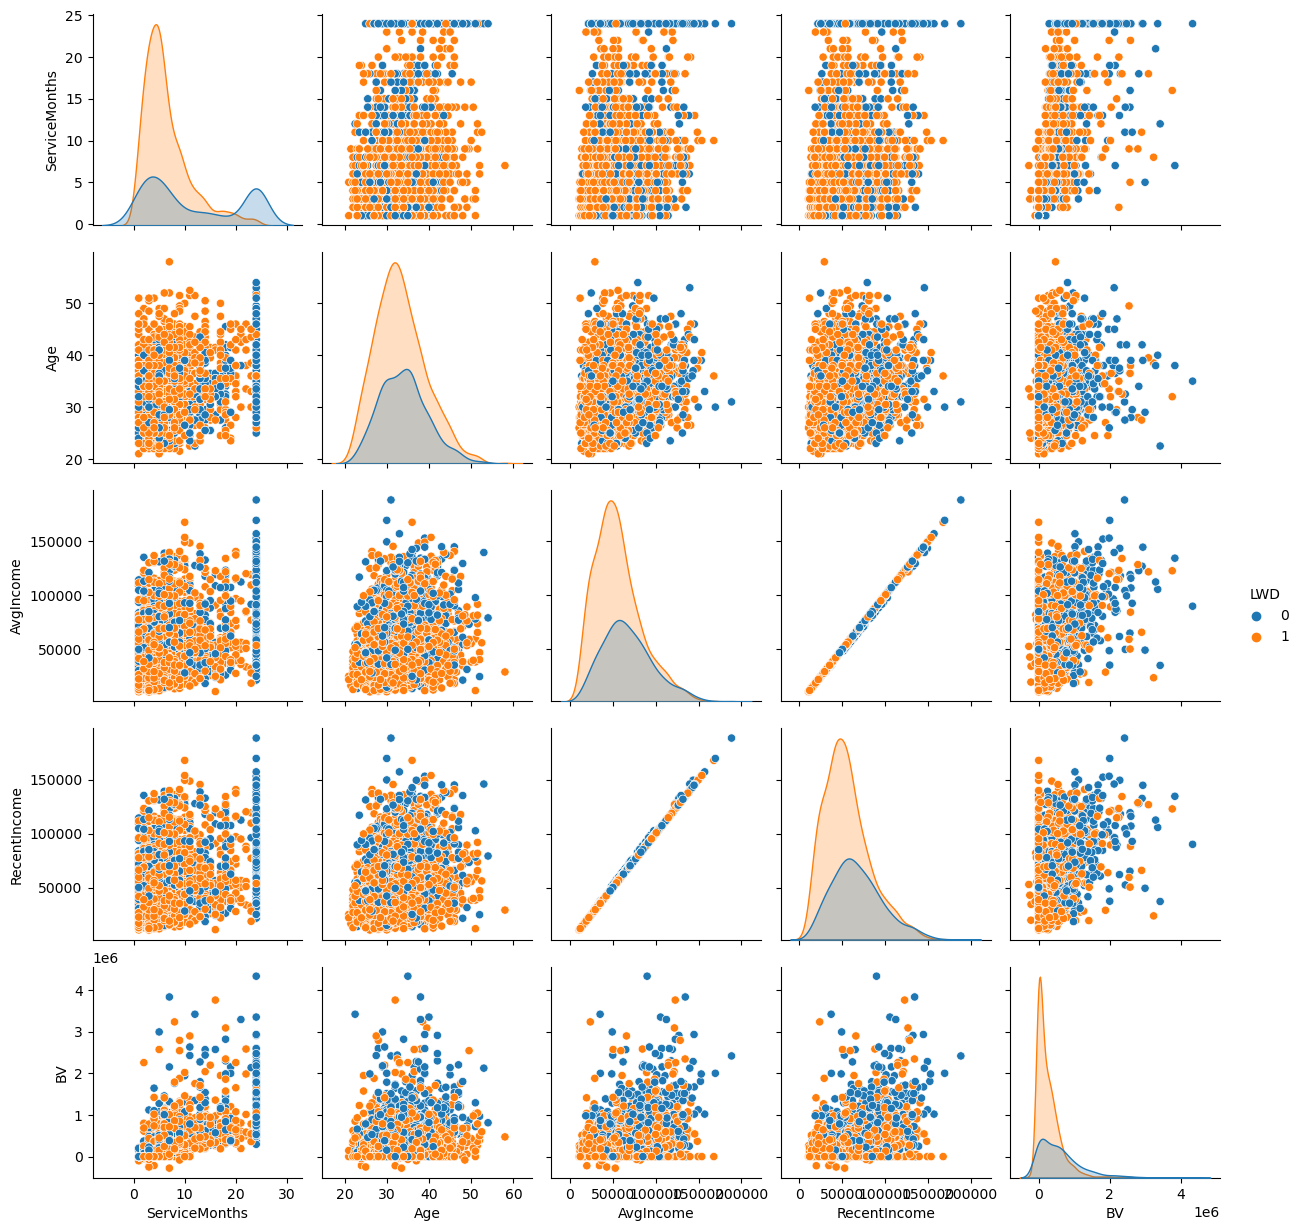

In [116]:
sns.pairplot(df_final[num_features+['LWD']], hue='LWD')

#### Inference:
- Drivers with longer service durations are less likely to churn.
- Drivers contributing less business value are highly likely to churn.
- Drivers earning below-average income are highly likely to churn.

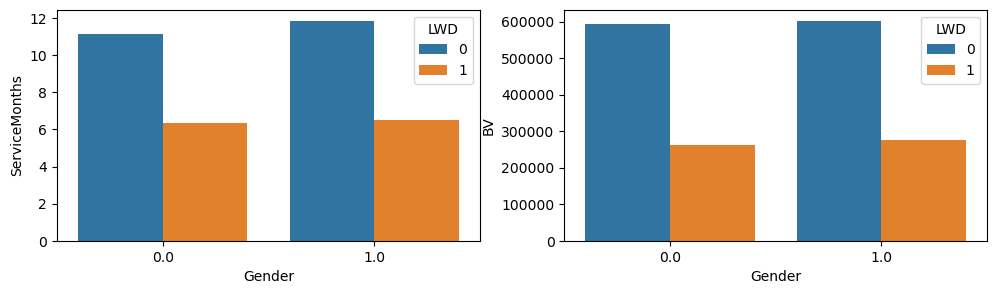

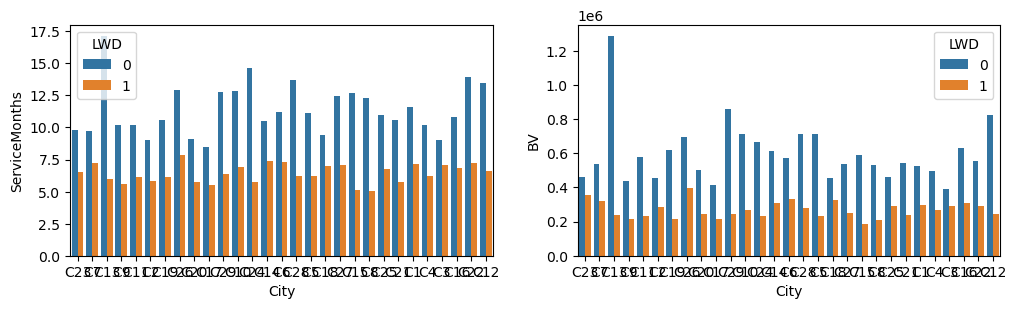

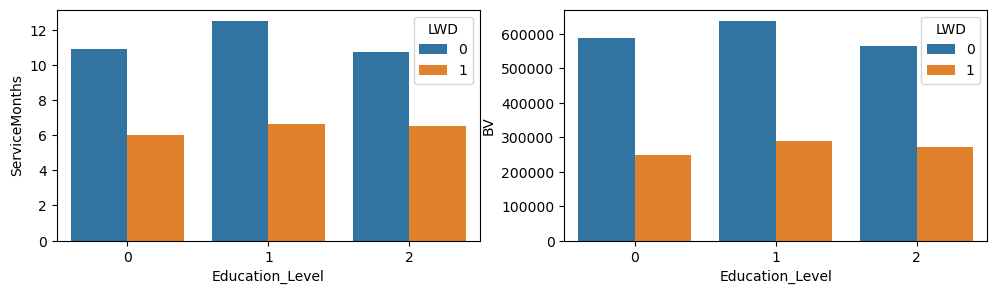

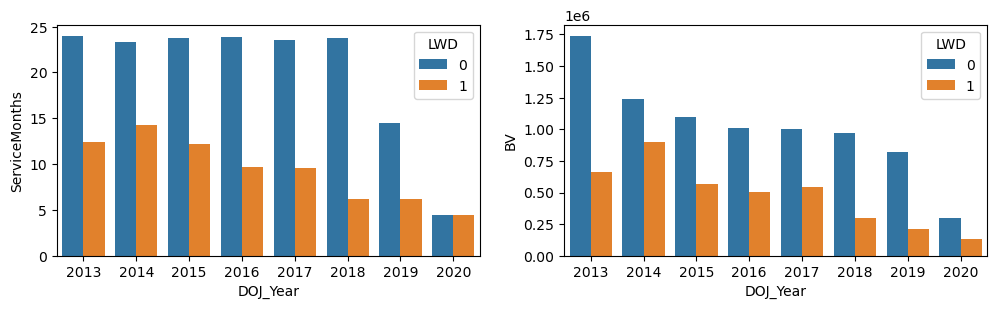

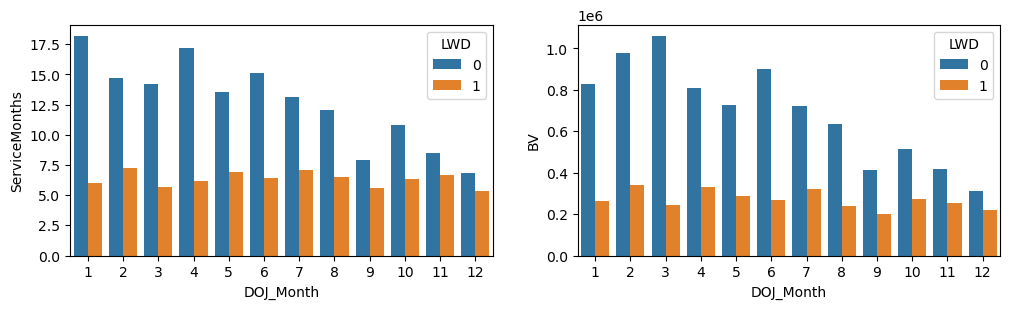

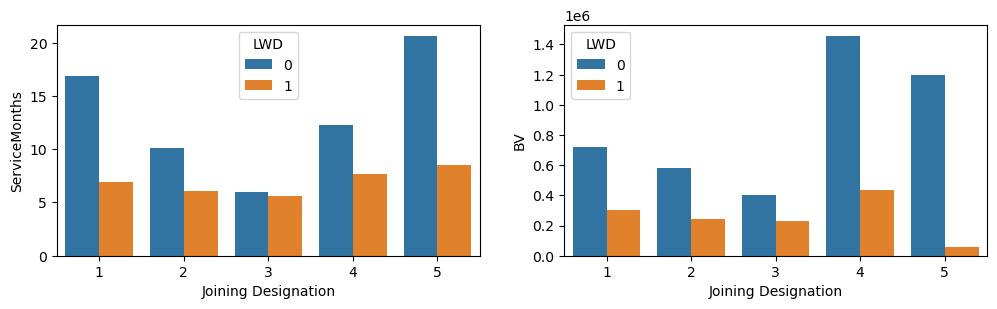

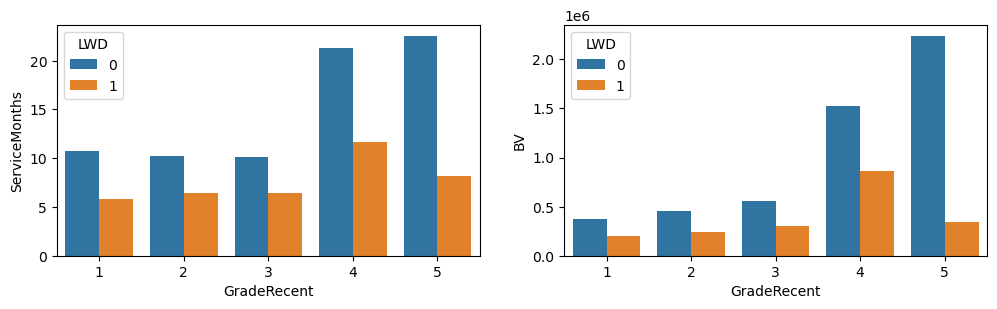

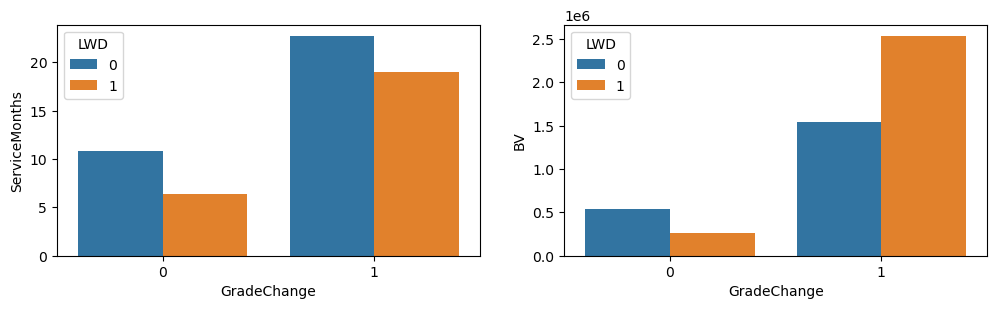

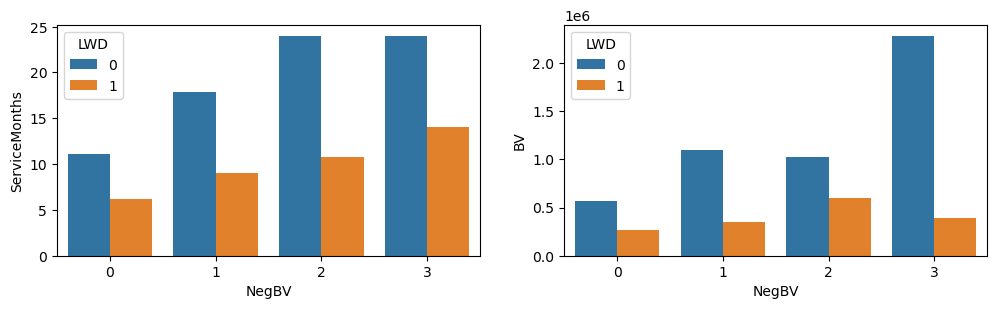

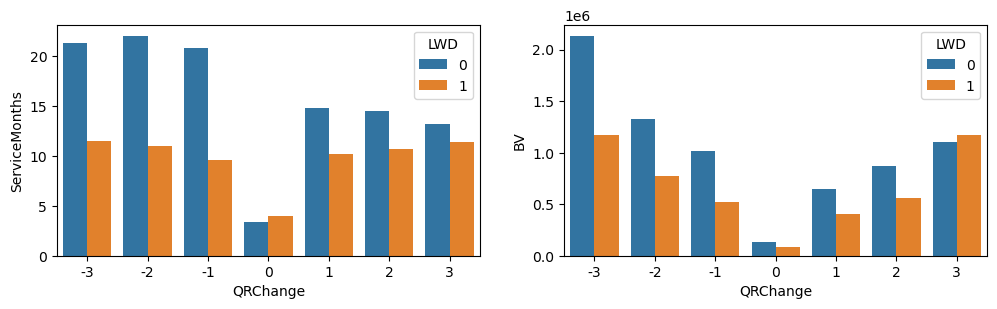

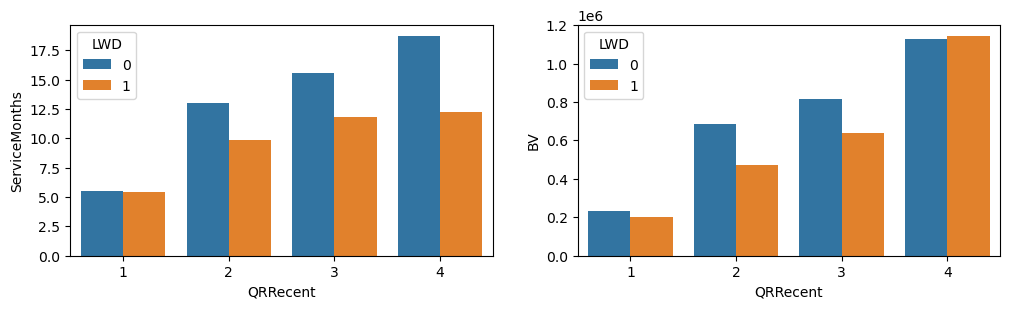

In [135]:
#Categorical Vs Numerical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.barplot(data=df_final, x=feature, y='ServiceMonths', hue='LWD', estimator='mean', errorbar=None)
    #plt.title("LWD Vs " + feature1)
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    sns.barplot(data=df_final, x=feature, y='BV', hue='LWD', estimator='mean', errorbar=None)
    #plt.title("LWD Vs " + feature2)
    plt.show()

#### Inference:
- Drivers with longer service duration is less likely to churn 
- Interestingly, Highly rated drivers or drivers with increase in quarterly rating churns more
- Drivers with more number of negative business values churn less likely

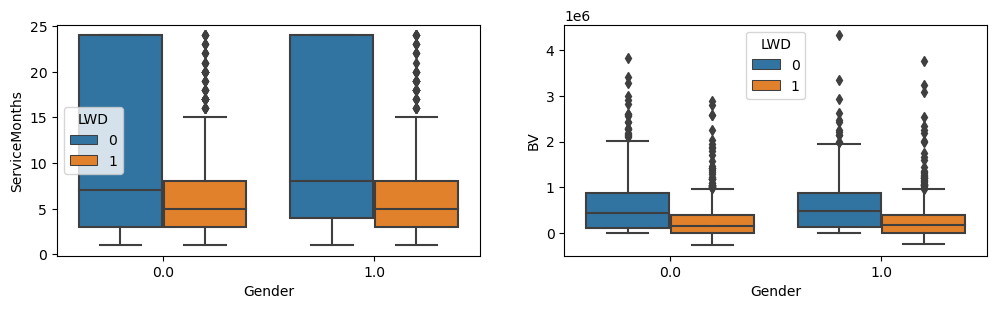

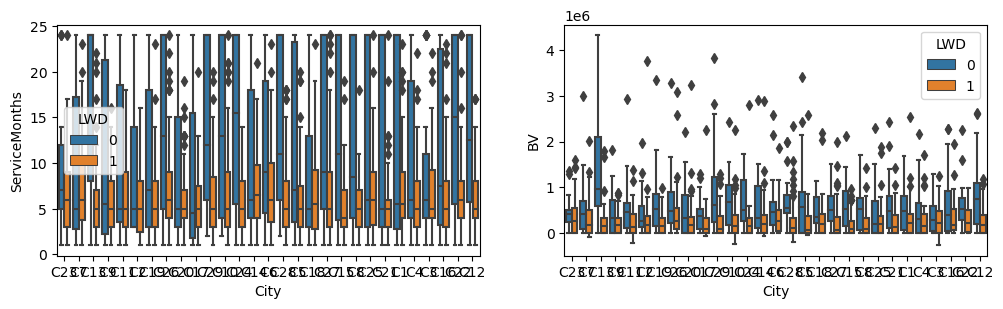

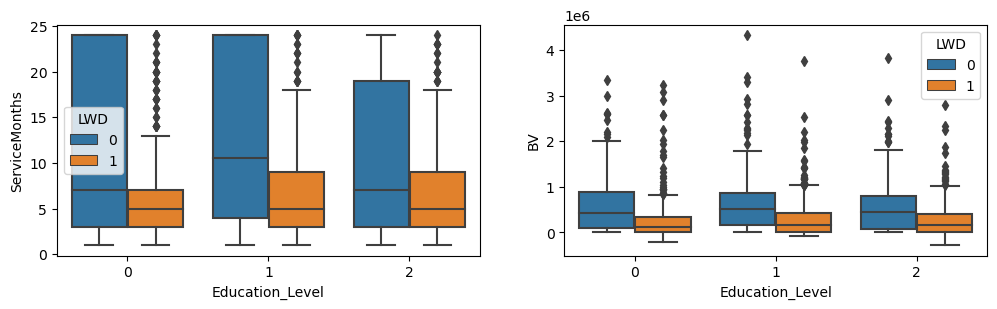

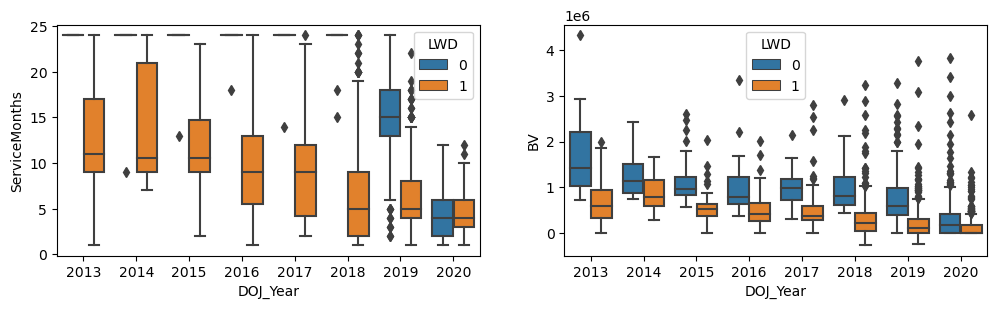

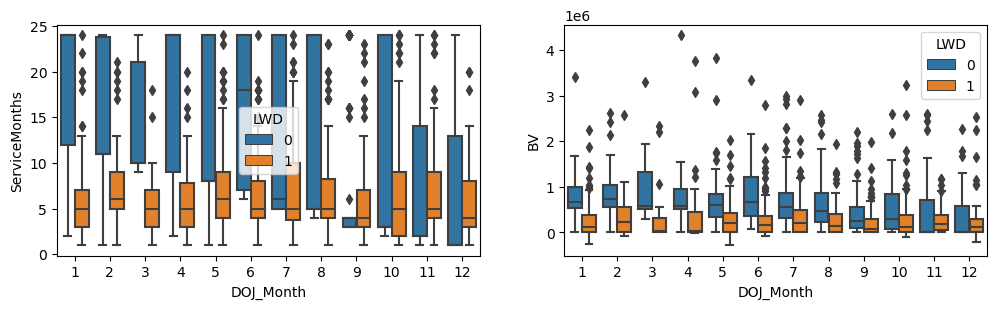

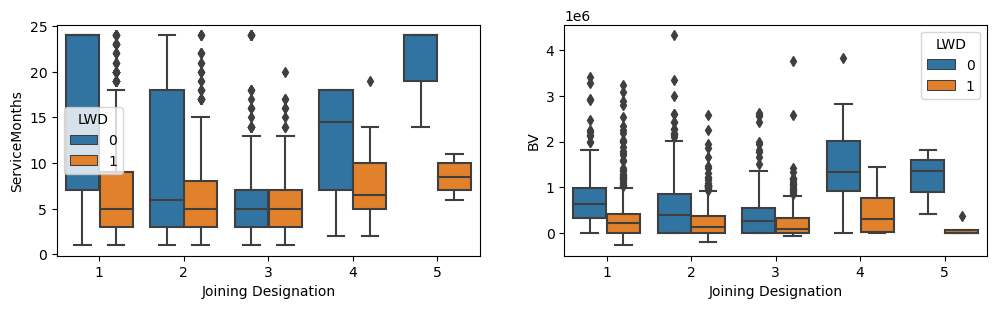

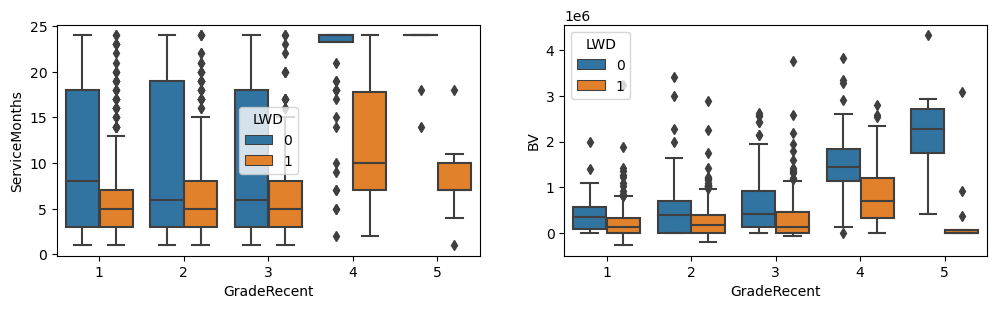

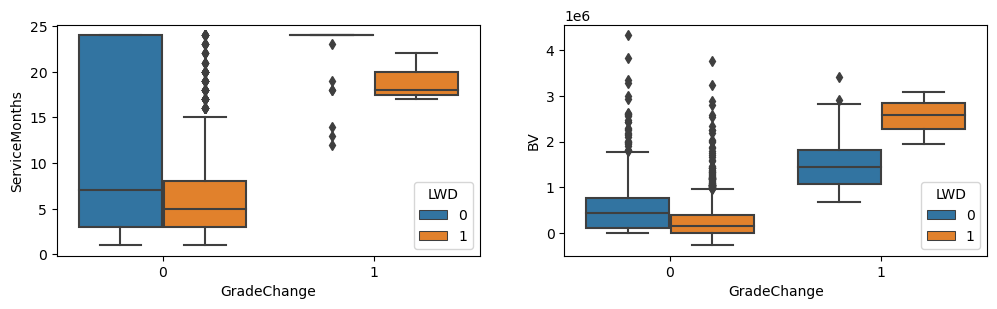

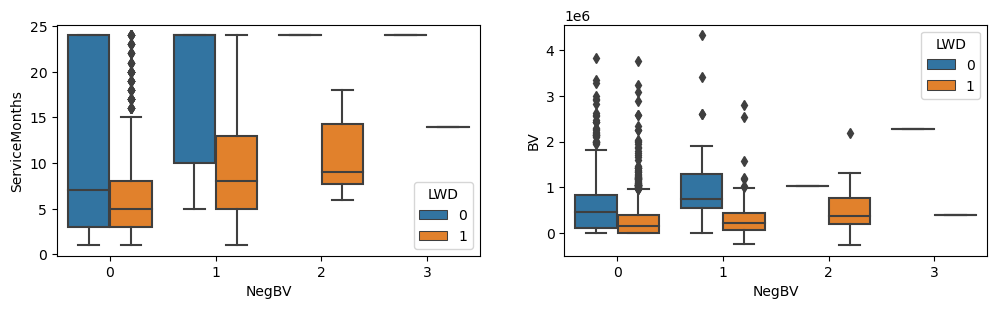

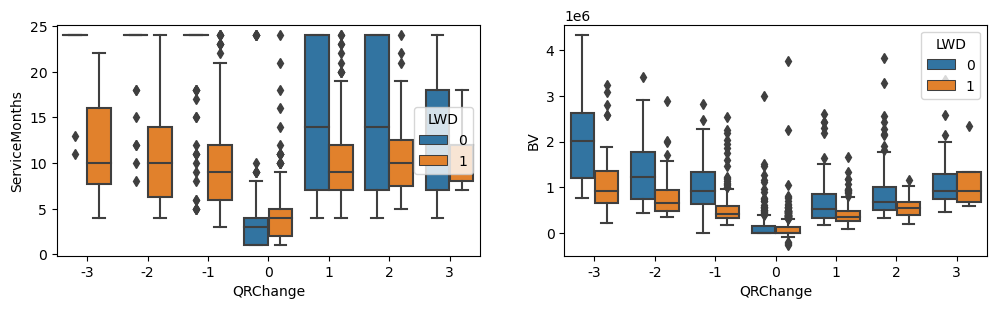

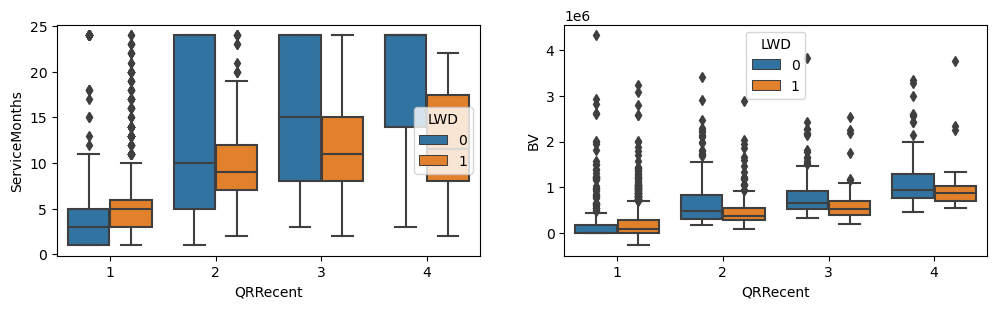

In [137]:
#Categorical Vs Numerical Features
for feature in cat_features:
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    sns.boxplot(data=df_final, x=feature, y='ServiceMonths', hue='LWD')
    #plt.title("LWD Vs " + feature1)
    plt.subplot(1,2,2)
    labels = df_final[feature].value_counts().index
    sns.boxplot(data=df_final, x=feature, y='BV', hue='LWD')
    #plt.title("LWD Vs " + feature2)
    plt.show()

#### Inference:
- Grade change and higher recent grade shows high possibility for churning
- All the features are severly affected with outliers

# Statistical Analysis
- 2 sample T-Test (Numerical Features)
- Chisquare Test (Categorical Features)

In [151]:
from scipy.stats import ttest_ind 
from scipy.stats import chi2_contingency

In [165]:
def two_sample_test(sample1, sample2, feature, alpha=0.05):
    tstat, pval = ttest_ind(sample1, sample2)
    if pval < alpha:
        print(bold_start + f"Mean {feature} of the churn and not churn drivers are significantly different" + bold_end)
    else:
        print(f"Mean {feature} of the churn and not churn drivers are not significantly different")

In [166]:
for feature in num_features:
    s1 = df_final[df_final['LWD']==0][feature]
    s2 = df_final[df_final['LWD']==1][feature]
    two_sample_test(s1, s2, feature)

Mean ServiceMonths of the churn and not churn drivers are significantly different
Mean Age of the churn and not churn drivers are not significantly different
Mean AvgIncome of the churn and not churn drivers are significantly different
Mean RecentIncome of the churn and not churn drivers are significantly different
Mean BV of the churn and not churn drivers are significantly different


#### Inference:
- Mean Age of drivers doesn't show significant relation to distinguish between churn and non churn drivers, hence the feature may not support model for prediction

In [163]:
def chi_test(sample1, sample2, feature, alpha=0.05):
    ct = pd.crosstab(sample1, sample2)
    tstat, pval, dof, exp = chi2_contingency(ct)
    if pval < alpha:
        print(f"{feature} and churning of drivers are significantly not independent")
    else:
        print(bold_start + f"{feature} and churning of drivers are significantly independent" + bold_end)

In [164]:
for feature in cat_features:
    chi_test(df_final[feature], df_final['LWD'], feature, alpha=0.05)

Gender and churning of drivers are significantly independent
City and churning of drivers are significantly not independent
Education_Level and churning of drivers are significantly independent
DOJ_Year and churning of drivers are significantly not independent
DOJ_Month and churning of drivers are significantly not independent
Joining Designation and churning of drivers are significantly not independent
GradeRecent and churning of drivers are significantly not independent
GradeChange and churning of drivers are significantly not independent
NegBV and churning of drivers are significantly independent
QRChange and churning of drivers are significantly not independent
QRRecent and churning of drivers are significantly not independent


#### Inference:
- Gender, Education Level and No. of negative business value features doesn't show significant relation with the churning of drivers and it confirms our assumption from EDA

## Kruskal Walis Test

In [225]:
#Average Income vs Recent Income
ks_stat, pval = stats.kstest(df_final['AvgIncome'], df_final['RecentIncome'])
if pval < 0.05:
    print("The distributions of Average income and Recent income are significantly different")
else:
    print(bold_start + "The distributions of Average income and Recent income are not significantly different" + bold_end)

The distributions of Average income and Recent income are not significantly different


#### Inference:
- Since the distribution of Average income and Recent income features are similar, including both features add redundancy

## Normality Test

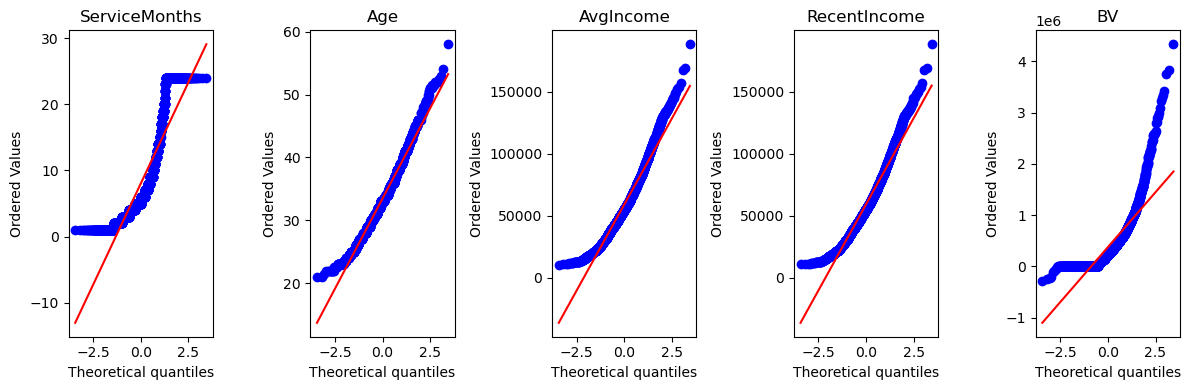

In [195]:
cnt = 1
plt.figure(figsize=(12,4))
for feature in num_features:
    plt.subplot(1,5,cnt)
    stats.probplot(df_final[feature], dist="norm", plot=plt)
    plt.title(feature)
    cnt += 1
plt.tight_layout()
plt.show()

In [198]:
def shapiro_test(data, feature, alpha=0.05):
    w_stat, pval = stats.shapiro(data)
    if pval < alpha:
        print(f"{feature} doesn't follow normal distribution")
    else:
        print(bold_start + f"{feature} follows normal distribution" + bold_end)

In [199]:
for feature in num_features:
    shapiro_test(df_final[feature], feature)

ServiceMonths doesn't follow normal distribution
Age doesn't follow normal distribution
AvgIncome doesn't follow normal distribution
RecentIncome doesn't follow normal distribution
BV doesn't follow normal distribution


#### Inference:
- Both QQPlot and Shapiro wilk test confirms that none of the numerical features follow normal distribution

# Feature Engineering

## Null Treatment

<Axes: xlabel='Gender', ylabel='Count'>

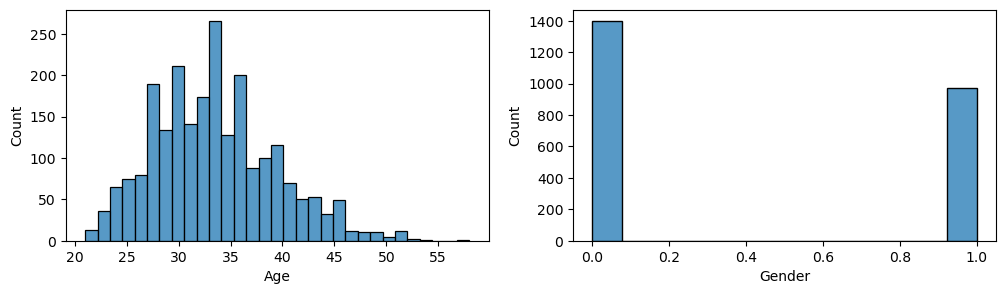

In [169]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.histplot(df_final['Age'])
plt.subplot(1,2,2)
sns.countplot(df_final['Gender'])

In [206]:
print("Mean and Median of Age: ", df_final['Age'].mean().round(2), ",",  df_final['Age'].median())

Mean and Median of Age:  33.47 , 33.0


In [208]:
print("Mode of Gender: ", df_final['Gender'].mode()[0])

Mode of Gender:  0.0


In [182]:
df_final['Age'] = df_final['Age'].fillna(df_final['Age'].median())
df_final['Gender'] = df_final['Gender'].fillna(df_final['Gender'].mode()[0])

In [183]:
df_final.isnull().sum()

ServiceMonths          0
Age                    0
Gender                 0
City                   0
Education_Level        0
AvgIncome              0
RecentIncome           0
DOJ_Year               0
DOJ_Month              0
Joining Designation    0
GradeRecent            0
GradeChange            0
BV                     0
NegBV                  0
QRRecent               0
QRChange               0
LWD                    0
dtype: int64

#### Inference:
- Mean and Median of Age column is very much closer, hence median imputation is performed
- For Gender column, mode imputation is performed

## Outlier Analysis

C:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ADMIN\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


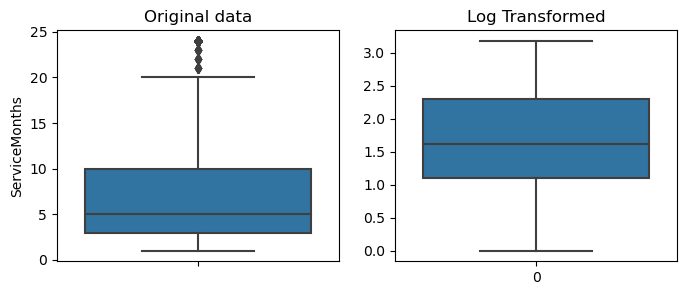

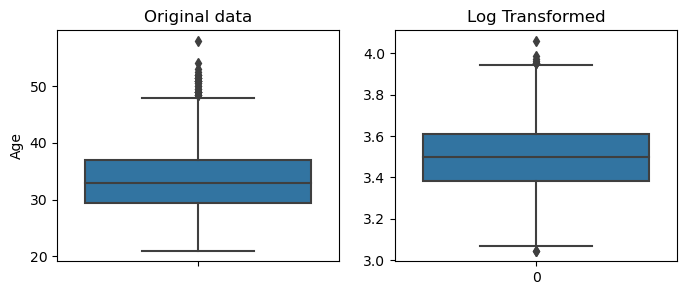

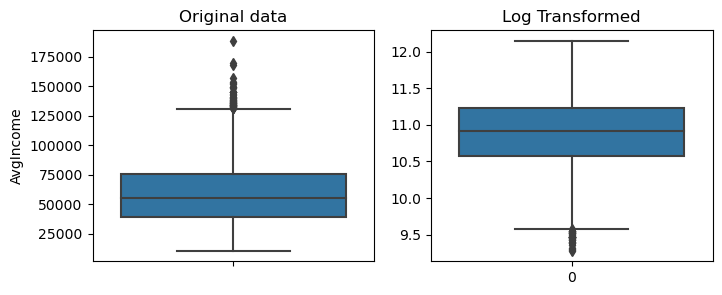

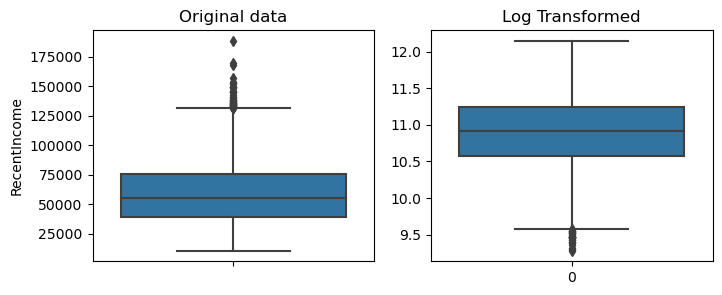

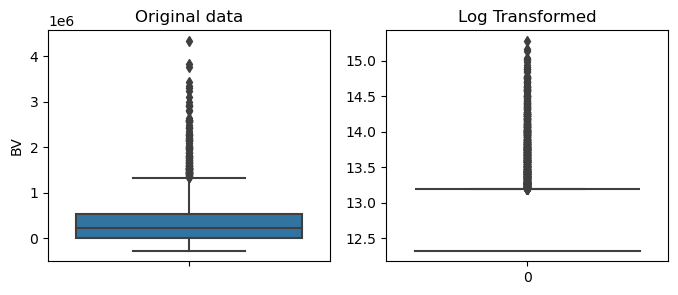

In [243]:
for feature in num_features:
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.boxplot(data = df_final, y= feature)
    plt.title("Original data")
    plt.subplot(1,2,2)
    sns.boxplot(np.array(np.log(df_final[feature])))
    plt.title("Log Transformed")


#### Inference:
- Log Transform treats outliers perfectly only for ServiceMonths feature
- After modeling, need to check whether outlier treatment required

## Transform Features

In [219]:
ordinal_features = ['Education_Level', 'Joining Designation', 'GradeRecent','GradeChange','NegBV','QRRecent', 'QRChange']
nominal_features = [feature for feature in cat_features if feature not in ordinal_features]
print("Ordinal Features: ", ordinal_features)
print("Nominal Features: ", nominal_features)

,ServiceMonths,Age,Gender,City,Education_Level,AvgIncome,RecentIncome,DOJ_Year,DOJ_Month,Joining Designation,GradeRecent,GradeChange,BV,NegBV,QRRecent,QRChange,LWD
1,3,28.0,0.0,C23,2,57387.0,57387,2018,12,1,1,0,571860.0,1,2,0,1
2,2,31.0,0.0,C7,2,67016.0,67016,2020,11,2,2,0,0.0,0,1,0,0
4,5,43.0,0.0,C13,2,65603.0,65603,2019,12,2,2,0,175000.0,0,1,0,1
5,3,29.0,0.0,C9,0,46368.0,46368,2019,1,1,1,0,60180.0,0,1,0,1
6,5,31.0,1.0,C11,1,78728.0,78728,2020,7,3,3,0,632500.0,0,2,1,0


In [252]:
# Ordinal Features
for feature in ordinal_features:
    print(feature, ":", df_final[feature].unique())

Education_Level : [2 0 1]
Joining Designation : [1 2 3 4 5]
GradeRecent : [1 2 3 4 5]
GradeChange : [0 1]
NegBV : [1 0 3 2]
QRRecent : [2 1 3 4]
QRChange : [ 0  1 -3 -1 -2  2  3]


In [254]:
# Nominal Features
for feature in nominal_features:
    print(feature, ":", df_final[feature].nunique())

Gender : 2
City : 29
DOJ_Year : 8
DOJ_Month : 12


In [ ]:
df_final_backup = df_final.copy()

In [278]:
X = df_final.drop("LWD", axis=1)
y = df_final["LWD"]
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [279]:
# Gender One hot encoding
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(xtrain[['Gender']])
xtrain[['Gender0', 'Gender1']] = encoded_data.toarray()
xtrain.drop('Gender', axis=1, inplace = True)

encoded_data = encoder.transform(xtest[['Gender']])
xtest[['Gender0', 'Gender1']] = encoded_data.toarray()
xtest.drop('Gender', axis=1, inplace = True)

In [280]:
# City, DOJ_Year, DOJ_Month are label encoding
for feature in nominal_features:
    if feature != 'Gender':
        freq_enc = xtrain[feature].value_counts(normalize=True)
        xtrain[feature] = xtrain[feature].map(freq_enc)
        xtest[feature] = xtest[feature].map(freq_enc)

In [281]:
xtrain.head()

,ServiceMonths,Age,City,Education_Level,AvgIncome,RecentIncome,DOJ_Year,DOJ_Month,Joining Designation,GradeRecent,GradeChange,BV,NegBV,QRRecent,QRChange,Gender0,Gender1
2763,9,37.5,0.034814,0,76756.0,76756,0.337935,0.042017,3,3,0,5.594967e+05,0,2,0,0.0,1.0
1067,4,40.5,0.033013,2,68596.0,68596,0.045618,0.042017,1,3,0,4.988525e+05,0,1,0,1.0,0.0
2375,1,41.0,0.033613,1,15189.0,15189,0.256903,0.112245,1,1,0,0.000000e+00,0,1,0,1.0,0.0
2600,9,41.5,0.030012,0,26460.0,26460,0.043217,0.112245,2,2,0,4.725962e+05,0,1,-2,0.0,1.0
873,18,32.5,0.033013,2,134302.0,134302,0.250300,0.022809,1,4,0,2.344274e+06,0,4,3,0.0,1.0


In [282]:
xtest.head()

,ServiceMonths,Age,City,Education_Level,AvgIncome,RecentIncome,DOJ_Year,DOJ_Month,Joining Designation,GradeRecent,GradeChange,BV,NegBV,QRRecent,QRChange,Gender0,Gender1
1663,5,36.0,0.034814,2,59481.0,59481,0.250300,0.106242,2,2,0,0.0,0,1,0,1.0,0.0
1264,5,27.0,0.030612,2,77369.0,77369,0.045618,0.042017,1,3,0,361327.5,1,1,0,0.0,1.0
1618,2,29.0,0.030612,1,56985.0,56985,0.337935,0.106242,2,2,0,0.0,0,1,0,1.0,0.0
2351,4,33.0,0.034814,2,31124.0,31124,0.250300,0.120648,1,1,0,0.0,0,1,0,1.0,0.0
1300,6,35.0,0.030612,2,39823.0,39823,0.250300,0.106242,1,1,0,175000.0,0,1,0,1.0,0.0


#### Inference:
- Though categorical encoding not required for decision tree models, the implementation of the same through sklearn library requires it
- Ordinal features in the dataset are already in the order, hence doesn't need any transformation
- Gender exhibits low cardinality, hence one hot encoding is performed
- Other nominal features are frequency encoded

# Models: Decision Tree

In [284]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(xtrain, ytrain)
print("Training Score:", model_dt.score(xtrain, ytrain))
print("Test Score:",  model_dt.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8909090909090909


In [289]:
feature_imp = [(model_dt.feature_names_in_[i], model_dt.feature_importances_[i]) for i in range(len(model_dt.feature_importances_))]
feature_imp = sorted(feature_imp, key = lambda x: x[1], reverse=True)

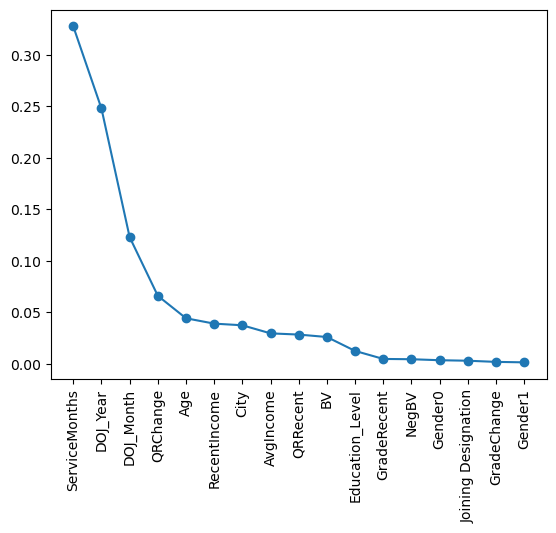

In [299]:
feature_names = [x[0] for x in feature_imp]
feature_imp_score = [x[1] for x in feature_imp]
plt.plot(feature_names, feature_imp_score, marker='o')
plt.xticks(rotation=90)
plt.show()

#### Inference:
- Basic Decision Tree classifier gives training accuracy of 100% and test accuracy of 89% indicates overfitting
- Service Months, Date of Joining and Change in Quarterly rating are the features highly influenced the prediction

## Balancing Classes

In [302]:
model_dt = DecisionTreeClassifier(class_weight = 'balanced', random_state=42)
model_dt.fit(xtrain, ytrain)
print("Training Score:", model_dt.score(xtrain, ytrain))
print("Test Score:",  model_dt.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8839160839160839


In [303]:
## Hyperparameter Tuning
params = {"max_depth": [3,5,7],
         "min_samples_split": [5, 10, 15],
          "ccp_alpha": [0.01, 0.05, 0.1]
         }

In [307]:
grid_res = RandomizedSearchCV(estimator=model_dt, param_distributions= params, cv = 3, scoring='accuracy')

In [308]:
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'ccp_alpha': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_split': [5, 10, 15]},
                   scoring='accuracy')

In [310]:
best_model = grid_res.best_estimator_

In [311]:
best_model.score(xtest, ytest)

0.8433566433566434

#### Inference:
- Addressing the Class imbalance and hyperparameter tuning doesn't improve the score much
- Ensembling models should be tried

# Ensemble Models

## Random Forest

In [320]:
rfc = RandomForestClassifier(class_weight='balanced', random_state=42)

In [321]:
rfc.fit(xtrain, ytrain)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [322]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Test Score:",  rfc.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.8895104895104895


### Hyperparameter Tuning

In [323]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [324]:
grid_res = RandomizedSearchCV(estimator=rfc, param_distributions= params, cv = 3, scoring='accuracy')

In [325]:
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [326]:
grid_res.cv_results_

{'mean_fit_time': array([2.40883358, 1.69152188, 1.55973673, 2.1092306 , 2.31041169,
        2.30140368, 1.59376733, 3.087111  , 0.48843948, 1.06829381]),
 'std_fit_time': array([0.38547501, 0.03572536, 0.66617249, 0.2844916 , 0.01813331,
        0.03084257, 0.03835209, 0.19648335, 0.00864868, 0.01800409]),
 'mean_score_time': array([0.14679885, 0.11510317, 0.06272332, 0.11577153, 0.14880077,
        0.14880077, 0.09008121, 0.15180357, 0.03302987, 0.06572652]),
 'std_score_time': array([0.01328719, 0.00432426, 0.00047131, 0.00124745, 0.00591238,
        0.00873907, 0.00141529, 0.00124881, 0.00081761, 0.00591252]),
 'param_n_estimators': masked_array(data=[500, 400, 200, 400, 500, 500, 300, 500, 100, 200],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[5, 10, 10, 10, 10, 2, 5, 5, 5, 10],
              mask=[False, False, False

In [328]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9987995198079231
Test Score: 0.9062937062937063


#### Inference:
- Overfitting is slightly reduced in the best estimator
- Also improves the test accuracy by 1%

### Gradient Boosting

In [333]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(xtrain, ytrain)
print("Training Score:", gbc.score(xtrain, ytrain))
print("Test Score:",  gbc.score(xtest, ytest))

Training Score: 0.9483793517406963
Test Score: 0.9188811188811189


#### Inference:
- Gradient Boosting classifier improves the test score by 3% compared to decision tree models
- Also regularizes the model for overfitting

### Hyperparameter Tuning

In [336]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Shrinks contribution of each tree
    'max_depth': [2, 3, 4, 5, 6],                  # Depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Min samples per leaf
    'subsample': [0.7, 0.8, 0.9, 1.0],          # Fraction of samples used per tree
    'max_features': ['sqrt', 'log2', None]      # Features considered for best split
}

In [337]:
grid_res = RandomizedSearchCV(estimator=gbc, param_distributions= params, cv = 3, scoring='accuracy')
grid_res.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [338]:
grid_res.cv_results_

{'mean_fit_time': array([1.91538922, 1.05228003, 0.47609488, 2.9733421 , 2.33410001,
        1.40793308, 1.19207303, 3.57755192, 0.24288503, 1.13135115]),
 'std_fit_time': array([0.24488536, 0.03555036, 0.08783771, 0.25732593, 0.02970262,
        0.00386143, 0.04240171, 0.09730699, 0.00411342, 0.2436976 ]),
 'mean_score_time': array([0.0116775 , 0.0076739 , 0.00633899, 0.01568071, 0.01034276,
        0.0113438 , 0.00934124, 0.01367903, 0.00567206, 0.00834084]),
 'std_score_time': array([0.00047154, 0.00047165, 0.0004716 , 0.00047182, 0.0004721 ,
        0.00047131, 0.00047171, 0.00047204, 0.0004716 , 0.00047188]),
 'param_subsample': masked_array(data=[0.8, 0.7, 0.9, 0.8, 1.0, 1.0, 0.9, 0.9, 0.8, 0.9],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 200, 100, 500, 200, 500, 500, 500, 100, 400],
              mask=[False, False

In [339]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9993997599039616
Test Score: 0.9272727272727272


#### Inference:
- The best estimator gives highest test accuracy of ~93% at the same time overfits the model
- Average fit time of the best model for this dataset is 3.5s

## XGBoost

In [340]:
from xgboost import XGBClassifier

In [341]:
xgb = XGBClassifier(random_state=42)
xgb.fit(xtrain, ytrain)
print("Training Score:", xgb.score(xtrain, ytrain))
print("Test Score:",  xgb.score(xtest, ytest))

Training Score: 1.0
Test Score: 0.9104895104895104


### Hyperparameter Tuning

In [342]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

In [343]:
grid_res = RandomizedSearchCV(estimator=xgb, param_distributions= params, cv = 3, scoring='accuracy')
grid_res.fit(xtrain, ytrain)

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_sa

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:15:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(sm

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   scoring='accuracy')

In [345]:
grid_res.cv_results_

{'mean_fit_time': array([1.17505844, 0.39869078, 0.12911661, 0.27524813, 0.37533784,
        0.06472532, 0.10642894, 0.42304707, 0.48210041, 0.50111763]),
 'std_fit_time': array([0.5662248 , 0.09129628, 0.0236438 , 0.02428388, 0.04463439,
        0.00094381, 0.00287027, 0.07444102, 0.03816819, 0.03165518]),
 'mean_score_time': array([0.01568007, 0.01568055, 0.0130113 , 0.01000889, 0.01067662,
        0.00900785, 0.01001   , 0.01334556, 0.01234444, 0.01868391]),
 'std_score_time': array([5.91081476e-03, 7.32456419e-03, 4.24632311e-03, 8.17021437e-04,
        4.71539192e-04, 2.97360213e-07, 8.18092236e-04, 2.62734549e-03,
        1.24850933e-03, 6.80469926e-03]),
 'param_subsample': masked_array(data=[0.9, 1.0, 0.8, 0.9, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 500, 100, 400, 500, 100, 100, 

In [344]:
best_model = grid_res.best_estimator_
print("Training Score:", best_model.score(xtrain, ytrain))
print("Test Score:",  best_model.score(xtest, ytest))

Training Score: 0.9939975990396158
Test Score: 0.9132867132867133


#### Inference:
- Slightly improved the score compared to base model but similar performance as that of random forest model
- Average fit time for this dataset is 0.4s that is ~10x speed compared to gradient boosting classifier 

# Logistic Regression Model

In [350]:
scaler = RobustScaler()
xtrain_scaled = xtrain.copy()
xtest_scaled = xtest.copy()
xtrain_scaled[num_features] = scaler.fit_transform(xtrain[num_features])
xtest_scaled[num_features] = scaler.fit_transform(xtest[num_features])

In [352]:
logr = LogisticRegression(class_weight='balanced')
logr.fit(xtrain, ytrain)
print("Training Score:", logr.score(xtrain, ytrain))
print("Test Score:",  logr.score(xtest, ytest))

Training Score: 0.6884753901560624
Test Score: 0.6909090909090909


1    1134
0     532
Name: LWD, dtype: int64